# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://docs.google.com/document/d/1rFITr7akurDRDU3FfO9qYtU2WChyhUpGosbBlvxHTMA/edit?usp=sharing
## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

national_df = pd.read_csv('national_df_LR.csv')

In [47]:
national_df.head()

,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,A_MEAN,H_MEAN,Year,AREA_TITLE
0,270000,"Arts, Design, Entertainment, Sports, and Media...",major,1815290.0,66100.0,31.78,2021,U.S.
1,271000,Art and Design Workers,minor,609150.0,58910.0,28.32,2021,U.S.
2,271010,Artists and Related Workers,broad,83070.0,95330.0,45.83,2021,U.S.
3,271011,Art Directors,detailed,42080.0,115430.0,55.50,2021,U.S.
4,271012,Craft Artists,detailed,3740.0,40730.0,19.58,2021,U.S.


In [48]:
national_df.dtypes

OCC_CODE        int64
OCC_TITLE      object
O_GROUP        object
TOT_EMP       float64
A_MEAN        float64
H_MEAN        float64
Year            int64
AREA_TITLE     object
dtype: object

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

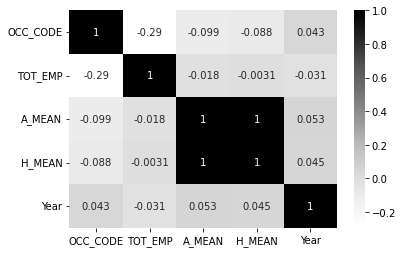

In [50]:
sns.heatmap(national_df.corr(), cmap='Greys', annot = True)
plt.show()

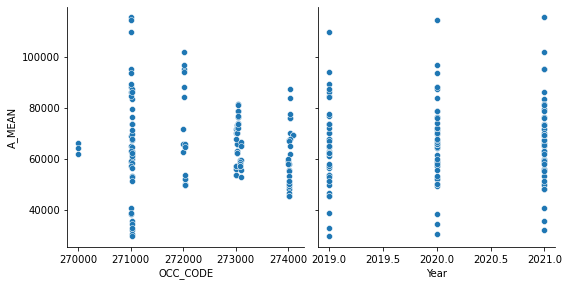

In [53]:
sns.pairplot(national_df, x_vars=['OCC_CODE', 'Year'], y_vars = 'A_MEAN', size = 4, aspect=1, kind= 'scatter')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [78]:
#assign x and y
x = national_df['OCC_CODE']
y = national_df['TOT_EMP']

In [79]:
#splitting the varaiables as training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [80]:
print(x_train)
y_train

73     271027
37     273040
6      271014
25     272041
21     272030
        ...  
87     273000
103    274011
67     271021
24     272040
8      271020
Name: OCC_CODE, Length: 114, dtype: int64


73      10980.0
37     185810.0
6       20430.0
25       9560.0
21       7850.0
         ...   
87     591650.0
103     62360.0
67      30100.0
24      33640.0
8      526080.0
Name: TOT_EMP, Length: 114, dtype: float64

In [81]:
#build the model
x_train_sm = sm.add_constant(x_train)

In [82]:
#Fitting the regression line using Ordinary Least Square
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const       1.658870e+07
OCC_CODE   -6.044591e+01
dtype: float64

In [83]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TOT_EMP   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     8.551
Date:                Sat, 04 Mar 2023   Prob (F-statistic):            0.00418
Time:                        18:28:28   Log-Likelihood:                -1581.5
No. Observations:                 114   AIC:                             3167.
Df Residuals:                     112   BIC:                             3172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.659e+07   5.63e+06      2.946      0.004    5.43e+06    2.77e+07
OCC_CODE     -60.4459     20.671     -2.924      0.004    -101.402     -19.490
==============================================================================
Omnibus:                      134.799   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2692.859
Skew:                           4.236   Prob(JB):                         0.00
Kurtosis:                      25.252   Cond. No.                     6.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

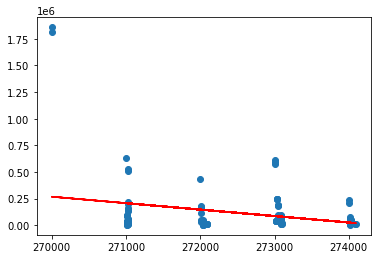

In [85]:
#Visualize the regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.658870e+07 + -6.044591e+01*x_train, 'r')
plt.show()

In [86]:
#Perform residual analysis
#Predict y_value using training data of x
y_train_pred = lr.predict(x_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

## Error Terms

Finally, plot your error terms!

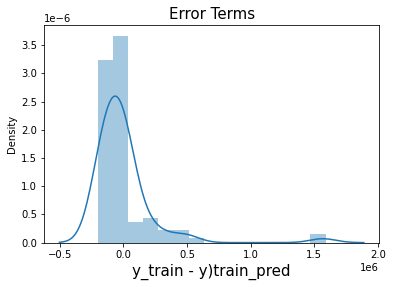

In [87]:
#plotting histogram using the residul values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y)train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.071, by any measure (financial or scientific purposes)this is considered to be too low to be considered reliable.
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No, this would not be the best way to predict the total number of employees based on their occupation.
3. Was your plot of the error terms a bell curve? Yes, but it is multimodal with the most significant curve being leptokurtic and positive skewed.